# Cox-PH and DeepSurv and possible extensions

This is adapted from a Jupyter Notebook for `DeepSurv` (CoxPH) continuous-time models at [`pycox`](https://github.com/havakv/pycox#continuous-time-models). It informs possible extensions for analyses at the end.

In this notebook we will train the [Cox-PH method](http://jmlr.org/papers/volume20/18-424/18-424.pdf), also known as [DeepSurv](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-018-0482-1).
We will use the METABRIC data sets as an example

A more detailed introduction to the `pycox` package can be found in [this notebook](https://nbviewer.jupyter.org/github/havakv/pycox/blob/master/examples/01_introduction.ipynb) about the `LogisticHazard` method.

The main benefit Cox-CC (and the other Cox methods) has over Logistic-Hazard is that it is a continuous-time method, meaning we do not need to discretize the time scale.

In [ ]:
# Added 2022Jun16 by yadevinit
mustInstall = [True, False][0] # Beware: Python3 indexing starts from 0, whereas R starts from 1!

In [3]:
# Added 2022Jun12 by yadevinit
if mustInstall:
    # refer https://stackoverflow.com/questions/9956741/how-to-install-multiple-python-packages-at-once-using-pip.
    !pip install numpy matplotlib sklearn
else:
    pass # do nothing.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 KB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 2.6 MB/s eta 0:00:007.6 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d2a6d7e36d52235198dad3e928c89f8255261ba5fda18292f57d5522ac4e2bb6
  Stored

In [4]:
## Uncomment to install `sklearn-pandas`
if mustInstall:
    ! pip install sklearn-pandas
else:
    pass # do nothing.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 KB 3.9 MB/s eta 0:00:00m eta 0:00:010:01:01


In [5]:
# Added 2022Jun12 by yadevinit
if mustInstall:
    !pip install torch torchtuples pycox
else:
    pass # do nothing.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB ? eta 0:00:00B/s eta 0:00:010:00:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 KB 1.4 MB/s eta 0:00:008.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 2.4 MB/s eta 0

  Created wheel for py7zr: filename=py7zr-0.18.9-py3-none-any.whl size=64933 sha256=e9c2129ae0a97d288767054bf9d1a7407c9ec99348d090d942057b65add313ca
  Stored in directory: /home/user1/.cache/pip/wheels/24/0a/c1/33dce4cabd3d57cde52dc955ce55db8ef034c02e25bb5251e7
Successfully built feather-format py7zr


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [7]:
np.random.seed(1234)
_ = torch.manual_seed(123)

## Dataset

We load the METABRIC data set and split in train, test and validation.

In [8]:
df_train = metabric.read_df()
df_test = df_train.sample(frac=0.2)
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

Dataset 'metabric' not locally available. Downloading...
Done


In [9]:
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,duration,event
0,5.603834,7.811392,10.797988,5.967607,1.0,1.0,0.0,1.0,56.840000,99.333336,0
1,5.284882,9.581043,10.204620,5.664970,1.0,0.0,0.0,1.0,85.940002,95.733330,1
3,6.654017,5.341846,8.646379,5.655888,0.0,0.0,0.0,0.0,66.910004,239.300003,0
4,5.456747,5.339741,10.555724,6.008429,1.0,0.0,0.0,1.0,67.849998,56.933334,1
5,5.425826,6.331182,10.455145,5.749053,1.0,1.0,0.0,1.0,70.519997,123.533333,0


## Feature transforms
We have 9 covariates, in addition to the durations and event indicators.

We will standardize the 5 numerical covariates, and leave the binary variables as is. As variables needs to be of type `'float32'`, as this is required by pytorch.

In [10]:
cols_standardize = ['x0', 'x1', 'x2', 'x3', 'x8']
cols_leave = ['x4', 'x5', 'x6', 'x7']

standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

In [11]:
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

We need no label transforms

In [12]:
get_target = lambda df: (df['duration'].values, df['event'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
durations_test, events_test = get_target(df_test)
val = x_val, y_val

## Neural net

We create a simple MLP with two hidden layers, ReLU activations, batch norm and dropout. 
Here, we just use the `torchtuples.practical.MLPVanilla` net to do this.

Note that we set `out_features` to 1, and that we have not `output_bias`.

In [13]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

## Training the model

To train the model we need to define an optimizer. You can choose any `torch.optim` optimizer, but here we instead use one from `tt.optim` as it has some added functionality.
We use the `Adam` optimizer, but instead of choosing a learning rate, we will use the scheme proposed by [Smith 2017](https://arxiv.org/pdf/1506.01186.pdf) to find a suitable learning rate with `model.lr_finder`. See [this post](https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6) for an explanation.

In [14]:
model = CoxPH(net, tt.optim.Adam)

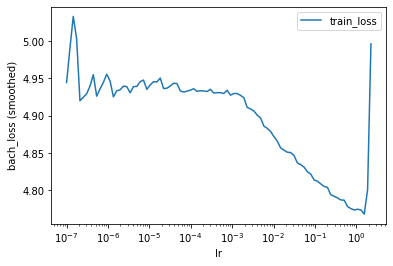

In [15]:
batch_size = 256
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

In [16]:
lrfinder.get_best_lr()

0.15556761439304817

Often, this learning rate is a little high, so we instead set it manually to 0.01

In [17]:
model.optimizer.set_lr(0.01)

We include the `EarlyStopping` callback to stop training when the validation loss stops improving. After training, this callback will also load the best performing model in terms of validation loss.

In [18]:
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

In [19]:
%%time
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

0:	[0s / 0s],		train_loss: 4.7473,	val_loss: 3.9412
1:	[0s / 0s],		train_loss: 4.6880,	val_loss: 3.9380
2:	[0s / 0s],		train_loss: 4.6413,	val_loss: 3.9437
3:	[0s / 0s],		train_loss: 4.6102,	val_loss: 3.9427
4:	[0s / 0s],		train_loss: 4.6077,	val_loss: 3.9328
5:	[0s / 0s],		train_loss: 4.5807,	val_loss: 3.9327
6:	[0s / 0s],		train_loss: 4.5912,	val_loss: 3.9441
7:	[0s / 0s],		train_loss: 4.5547,	val_loss: 3.9270
8:	[0s / 0s],		train_loss: 4.5556,	val_loss: 3.9250
9:	[0s / 1s],		train_loss: 4.5763,	val_loss: 3.9321
10:	[0s / 1s],		train_loss: 4.5493,	val_loss: 3.9433
11:	[0s / 1s],		train_loss: 4.5647,	val_loss: 3.9443
12:	[0s / 1s],		train_loss: 4.5436,	val_loss: 3.9558
13:	[0s / 1s],		train_loss: 4.5419,	val_loss: 3.9481
14:	[0s / 1s],		train_loss: 4.5318,	val_loss: 3.9430
15:	[0s / 1s],		train_loss: 4.5572,	val_loss: 3.9440
16:	[0s / 1s],		train_loss: 4.5308,	val_loss: 3.9473
17:	[0s / 1s],		train_loss: 4.5415,	val_loss: 3.9534
18:	[0s / 1s],		train_loss: 4.5244,	val_loss: 3.9596
CPU

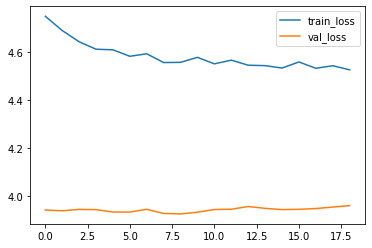

In [20]:
_ = log.plot()

We can get the partial log-likelihood

In [21]:
model.partial_log_likelihood(*val).mean()

-4.992127

## Prediction

For evaluation we first need to obtain survival estimates for the test set.
This can be done with `model.predict_surv` which returns an array of survival estimates, or with `model.predict_surv_df` which returns the survival estimates as a dataframe.

However, as `CoxPH` is semi-parametric, we first need to get the non-parametric baseline hazard estimates with `compute_baseline_hazards`. 

Note that for large datasets the `sample` argument can be used to estimate the baseline hazard on a subset.

In [22]:
_ = model.compute_baseline_hazards()

In [23]:
surv = model.predict_surv_df(x_test)

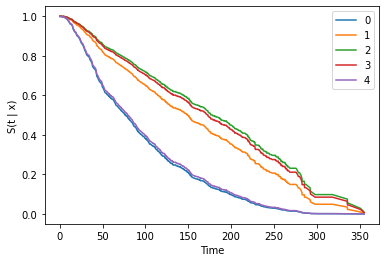

In [24]:
surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

## Evaluation

We can use the `EvalSurv` class for evaluation the concordance, brier score and binomial log-likelihood. Setting `censor_surv='km'` means that we estimate the censoring distribution by Kaplan-Meier on the test set.

In [25]:
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

In [26]:
ev.concordance_td()

0.6531403627733514

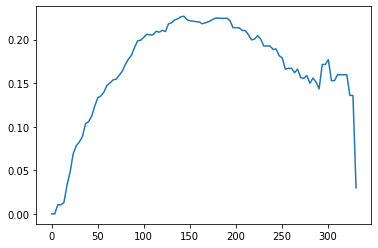

In [27]:
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

In [28]:
ev.integrated_brier_score(time_grid)

0.1687832339727394

In [29]:
ev.integrated_nbll(time_grid)

0.49928743172005075

In [30]:
### Added by yadevinit 2022Jun12:
# http://arxiv.org/abs/1606.00931 "DeepSurv: Personalized Treatment Recommender System Using A
# Cox Proportional Hazards Deep Neural Network" said:
# "... and The Molecular Taxonomy of Breast Cancer International Consortium (METABRIC).
# Because previous research shows that neural networks do not outperform the CPH, our goal is to
# demonstrate that DeepSurv does indeed have state-of-the-art predictive ability in practice on real survival
# datasets..."

In [31]:
### Extension possibility #1:
# Refer https://autonlab.github.io/auton-survival/ and its White Paper link
# https://www.cs.cmu.edu/~chiragn/papers/auton_survival.pdf
# "auton-survival: an Open-Source Package for Regression, Counterfactual Estimation, Evaluation and Phenotyping
# with Censored Time-to-Event Data" (2022Apr). It includes Deep Survival Machines and DeepSurv and compares
# with Python survival-analyses pipeline/workflow packages such as `lifelines` and `pycox`.

In [32]:
### Extension possibility #2:
# Refer http://proceedings.mlr.press/v119/yamada20a/yamada20a-supp.pdf
# "Feature Selection using Stochastic Gates- Supplementary Material" (2020Aug). Under heading Reproducibility,
# it gives Details of Cox Proportional Hazard Model. It supplements
# http://proceedings.mlr.press/v119/yamada20a/yamada20a.pdf "Feature Selection using Stochastic Gates".
# https://github.com/runopti/stg/tree/master/python is referred to by https://github.com/jaredleekatzman/DeepSurv
# "... For an updated implementation of the Cox loss function in PyTorch ...".